In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,629 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and dire

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
fontpath='/usr/share/fonts/trutype/nanum/NaumBarunGothic.ttf'
font=fm.FontProperties(fname=fontpath, size=9)
plt.rc('font',family='NanumBarunGothic')

In [ ]:
# 설치
!pip install --upgrade numpy pandas pycaret openpyxl

# 데이터 업로드
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/공공칠빵/교육 공공데이터 분석 및 활용대회 데이터셋_공공칠빵 - 재수생 예측.csv')

  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 예측 재수생 수와 다른 모든 열에서 결측값 제거
df = df.dropna()  # 모든 열에서 결측값 제거


In [ ]:
# 데이터 상태 확인
print("결측값 개수:\n", df.isna().sum())  # 각 열의 결측값 개수 출력
print("데이터 크기:", df.shape)  # 데이터의 행과 열 크기 확인

결측값 개수:
 학년도             0
총 응시자수          0
고3 학생수          0
졸업생 수(재수생 수)    0
재수생 비율          0
대입 제도 개편여부      0
개편 강도           0
사교육비 (1인당)      0
dtype: int64
데이터 크기: (18, 8)


In [ ]:
# 만약 데이터가 충분하지 않으면 데이터가 없다는 메시지를 출력하도록 함
if df.shape[0] == 0:
    print("데이터가 부족하여 모델 학습을 진행할 수 없습니다.")
else:
    # 예측하고 싶은 열을 새로운 target으로 설정 (예: '재수생 비율')
    from pycaret.regression import *
    reg = setup(data=df, target='재수생 비율', session_id=123, verbose=False)  # 새로운 target을 설정

In [ ]:
# PyCaret 설정
from pycaret.regression import *
reg = setup(data=df, target='재수생 비율', session_id=123, verbose=False)  # 예측할 열 변경
# PyCaret의 setup 함수를 사용하여 회귀 분석 환경을 설정합니다. 여기서 target은 예측하고자 하는 '재수생 비율'입니다.

In [ ]:
# 모델 학습
best_model = compare_models()
# 여러 회귀 모델을 비교하여 가장 성능이 좋은 모델을 선택합니다.

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0022,0.0000,0.0023,nan,0.0018,0.0099,0.9220
lasso,Lasso Regression,0.0020,0.0000,0.0021,nan,0.0017,0.0086,0.0420
ridge,Ridge Regression,0.0021,0.0000,0.0021,nan,0.0017,0.0092,0.0220
en,Elastic Net,0.0019,0.0000,0.0020,nan,0.0016,0.0083,0.0260
lar,Least Angle Regression,0.0022,0.0000,0.0023,nan,0.0018,0.0099,0.0230
llar,Lasso Least Angle Regression,0.0015,0.0000,0.0016,nan,0.0013,0.0068,0.0240
omp,Orthogonal Matching Pursuit,0.0103,0.0002,0.0109,nan,0.0088,0.0440,0.0540
br,Bayesian Ridge,0.0019,0.0000,0.0019,nan,0.0015,0.0083,0.0490
par,Passive Aggressive Regressor,0.0547,0.0042,0.0577,nan,0.0463,0.2380,0.0440
huber,Huber Regressor,0.0095,0.0001,0.0098,nan,0.0079,0.0404,0.0390


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# 모델 성능 확인
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# 예측 예시
predictions = predict_model(best_model)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0018,0.0000,0.0021,0.9917,0.0017,0.0077


,학년도,총 응시자수,고3 학생수,졸업생 수(재수생 수),대입 제도 개편여부,개편 강도,사교육비 (1인당),재수생 비율,prediction_label
18,2011,712227,541880,154661,0,0,24.000000,0.2172,0.220112
25,2018,593527,444873,137533,1,1,29.100000,0.2317,0.231292
28,2021,493434,346673,133070,0,0,36.700001,0.2697,0.266584
22,2015,640621,495027,131539,0,0,24.400000,0.2053,0.205436
19,2012,693631,526418,151887,0,0,23.600000,0.2190,0.221799


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 예: 총 응시자수 예측
X_years = df['학년도'].values.reshape(-1, 1)
y_total = df['총 응시자수'].values

model_total = LinearRegression()
model_total.fit(X_years, y_total)

predicted_total_2029 = model_total.predict([[2029]])[0]
# '학년도'를 독립 변수로, '총 응시자수'를 종속 변수로 설정하여 선형 회귀 모델을 학습하고, 2029년의 총 응시자수를 예측합니다.

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# 예시 데이터프레임: df (학년도, 고3 학생수 컬럼이 있어야 함)
# df = pd.read_csv('your_data.csv')  # 이미 불러왔을 거라 가정

# 고3 학생수 예측 모델 학습
X_years = df[['학년도']]  # 2차원
y_high3 = df['고3 학생수']  # 1차원

model_high3 = LinearRegression()
model_high3.fit(X_years, y_high3)

# 2029년도 고3 학생수 예측
predicted_high3_2029 = model_high3.predict([[2029]])[0]

print("2029년 고3 학생수 예측값:", predicted_high3_2029)
#'고3 학생수'에 대한 선형 회귀 모델을 학습하고, 2029년의 값을 예측합니다.


2029년 고3 학생수 예측값: 326235.75094599277


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 연도별 졸업생 수 데이터로 모델 학습
X_years = df[['학년도']]
y_grads = df['졸업생 수(재수생 수)']

model_grads = LinearRegression()
model_grads.fit(X_years, y_grads)

# 2029년도 졸업생 수 예측
predicted_grads_2029 = model_grads.predict([[2029]])[0]
print("2029년 졸업생 수 예측값:", predicted_grads_2029)
#'졸업생 수(재수생 수)'에 대한 선형 회귀 모델을 학습하고, 2029년의 값을 예측합니다.


2029년 졸업생 수 예측값: 142681.5077399381


In [ ]:
# X, y 설정
y_edu_cost = df['사교육비 (1인당)']

# 모델 학습
model_edu_cost = LinearRegression()
model_edu_cost.fit(X_years, y_edu_cost)

# 예측
predicted_edu_cost_2029 = model_edu_cost.predict([[2029]])[0]
print("2029년 사교육비 예측:", predicted_edu_cost_2029)

#'사교육비 (1인당)'에 대한 선형 회귀 모델을 학습하고, 2029년의 값을 예측합니다.

2029년 사교육비 예측: 46.51857585139305


In [ ]:
data_2029 = pd.DataFrame([{
    '학년도': 2029,
    '총 응시자수': predicted_total_2029,
    '고3 학생수': predicted_high3_2029,
    '졸업생 수(재수생 수)': predicted_grads_2029,
    '대입 제도 개편여부': 1,
    '개편 강도': 2,
    '사교육비 (1인당)': predicted_edu_cost_2029,
    # 재수생 비율은 예측할 대상이라 넣지 않음
}])
#예측된 값들을 기반으로 2029년의 데이터를 구성합니다.


In [ ]:
# 예측에 필요한 feature들만 포함된 새로운 데이터프레임 생성
X_2029 = data_2029[['학년도', '총 응시자수', '고3 학생수', '졸업생 수(재수생 수)', '대입 제도 개편여부', '개편 강도', '사교육비 (1인당)']]

# 모델로 예측 수행
predicted_label_2029 = predict_model(best_model, data=X_2029)

# 예측 결과의 열 이름 확인
print(predicted_label_2029.columns)

# 예측된 재수생 비율 결과를 data_2029에 추가
# 예측 결과가 'Label'이 아니라면 열 이름을 'Prediction'으로 수정
data_2029['예측 재수생 비율'] = predicted_label_2029['prediction_label']

# 예측 결과 출력
print(data_2029)
#학습된 모델을 사용하여 2029년의 재수생 비율을 예측하고, 결과를 출력합니다.


Index(['학년도', '총 응시자수', '고3 학생수', '졸업생 수(재수생 수)', '대입 제도 개편여부', '개편 강도',
       '사교육비 (1인당)', 'prediction_label'],
      dtype='object')
    학년도         총 응시자수         고3 학생수  졸업생 수(재수생 수)  대입 제도 개편여부  개편 강도  \
0  2029  483841.923289  326235.750946  142681.50774           1      2   

   사교육비 (1인당)  예측 재수생 비율  
0   46.518576   0.289903  


In [ ]:
print(best_model)

LinearRegression(n_jobs=-1)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
fontpath='/usr/share/fonts/trutype/nanum/NaumBarunGothic.ttf'
font=fm.FontProperties(fname=fontpath, size=9)
plt.rc('font',family='NanumBarunGothic')

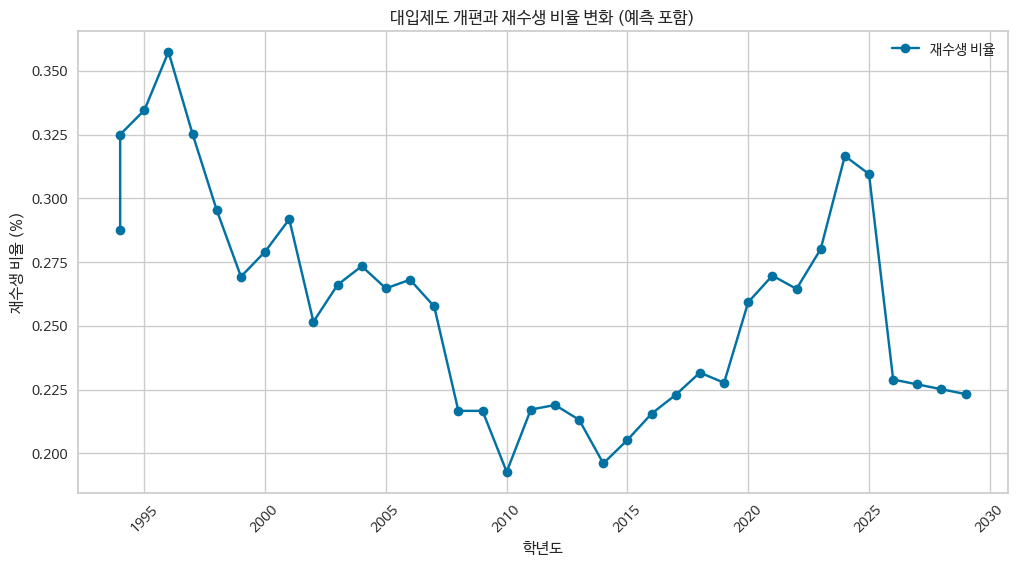

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# 데이터셋 로드 (여기서는 예시 파일을 가정)
df = pd.read_csv("/content/drive/MyDrive/공공칠빵/교육 공공데이터 분석 및 활용대회 데이터셋_공공칠빵 - 재수생 예측.csv")  # 파일 경로를 입력하세요.

# 예시로 필요한 열만 선택
df_filtered = df[['학년도', '재수생 비율']]

# 선형 회귀 모델 초기화
model = LinearRegression()

# 예측 연도 리스트
years_to_predict = [2026, 2027, 2028, 2029]

# 예측된 재수생 비율을 저장할 리스트
predicted_values = []

# 학년도 데이터를 X로, 재수생 비율을 Y로 설정
X = df_filtered['학년도'].values.reshape(-1, 1)
y = df_filtered['재수생 비율'].values

# 2026년 예측
model.fit(X, y)  # 1994-2025 데이터로 학습
predicted_2026 = model.predict([[2026]])[0]
predicted_values.append(predicted_2026)

# 2027년 예측 (2026까지 학습)
X_extended_2026 = np.append(X, [[2026]], axis=0)
y_extended_2026 = np.append(y, [predicted_2026])
model.fit(X_extended_2026, y_extended_2026)
predicted_2027 = model.predict([[2027]])[0]
predicted_values.append(predicted_2027)

# 2028년 예측 (2027까지 학습)
X_extended_2027 = np.append(X_extended_2026, [[2027]], axis=0)
y_extended_2027 = np.append(y_extended_2026, [predicted_2027])
model.fit(X_extended_2027, y_extended_2027)
predicted_2028 = model.predict([[2028]])[0]
predicted_values.append(predicted_2028)

# 2029년 예측 (2028까지 학습)
X_extended_2028 = np.append(X_extended_2027, [[2028]], axis=0)
y_extended_2028 = np.append(y_extended_2027, [predicted_2028])
model.fit(X_extended_2028, y_extended_2028)
predicted_2029 = model.predict([[2029]])[0]
predicted_values.append(predicted_2029)

# 예측된 값을 새로운 데이터프레임에 추가
predicted_years = [2026, 2027, 2028, 2029]
predicted_df = pd.DataFrame({
    '학년도': predicted_years,
    '재수생 비율': predicted_values,
})

# 기존 데이터와 예측 데이터를 합침
df_combined = pd.concat([df_filtered, predicted_df], ignore_index=True)

# 시각화
plt.figure(figsize=(12, 6))

# 재수생 비율 변화 시각화
plt.plot(df_combined['학년도'], df_combined['재수생 비율'], marker='o', linestyle='-', color='b', label='재수생 비율')

# 그래프 설정
plt.xlabel('학년도')
plt.ylabel('재수생 비율 (%)')
plt.title('대입제도 개편과 재수생 비율 변화 (예측 포함)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# 그래프 출력
plt.show()


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pycaret pandas flask pyngrok

In [ ]:
import pandas as pd
from pycaret.regression import *

# ▶︎ 학습 데이터 불러오기 (예시 CSV로 대체)
df = pd.read_csv('/content/drive/MyDrive/공공칠빵/교육 공공데이터 분석 및 활용대회 데이터셋_공공칠빵 - 재수생 예측.csv')  # 이 파일에 위 입력값과 target 포함되어 있어야 함

df = df.dropna(subset=['사교육비 (1인당)'])

saco_model = setup(
    data=df,
    target='사교육비 (1인당)',
    session_id=123
)


# ▶︎ 모델 학습 및 저장
best_model = compare_models()
save_model(best_model, 'saco_model')

,Description,Value
0,Session id,123
1,Target,사교육비 (1인당)
2,Target type,Regression
3,Original data shape,"(18, 8)"
4,Transformed data shape,"(18, 8)"
5,Transformed train set shape,"(12, 8)"
6,Transformed test set shape,"(6, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,2.1406,9.2132,2.2350,nan,0.0796,0.0745,0.0940
lasso,Lasso Regression,2.5354,10.2599,2.5911,nan,0.0860,0.0874,0.0580
ridge,Ridge Regression,2.5582,11.0673,2.6275,nan,0.0967,0.0908,0.0330
en,Elastic Net,2.4799,9.8654,2.5303,nan,0.0839,0.0852,0.0700
lar,Least Angle Regression,2.1600,9.3601,2.2542,nan,0.0806,0.0753,0.0740
llar,Lasso Least Angle Regression,2.2257,7.8489,2.2817,nan,0.0807,0.0791,0.0790
omp,Orthogonal Matching Pursuit,4.5163,26.4635,4.7421,nan,0.1658,0.1645,0.0450
br,Bayesian Ridge,4.1245,24.0582,4.2523,nan,0.1405,0.1479,0.0410
par,Passive Aggressive Regressor,5.2731,49.2272,5.3065,nan,0.1744,0.1740,0.0380
huber,Huber Regressor,3.7240,24.0511,3.7513,nan,0.1304,0.1348,0.0780


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['학년도', '총 응시자수', '고3 학생수',
                                              '졸업생 수(재수생 수)', '재수생 비율',
                                              '대입 제도 개편여부', '개편 강도'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model', LinearRegression(n_jobs=-1))]),
 'saco_model.pkl')

# flask 연결


In [ ]:
!pip install pycaret flask pyngrok

In [ ]:
from pyngrok import ngrok  # 추가

# ngrok 인증 토큰 설정
ngrok.set_auth_token("2wRUcvqdz16WTINXxk6u2Sgj5gN_2o61PhRRaPv2t6evveEJA")  # 🔑 반드시 본인의 토큰 입력!

# Flask 앱 초기화
app = Flask(__name__)

# 모델 로딩
model = load_model('saco_model')

# API 엔드포인트 정의
@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    df = pd.DataFrame(data)
    preds = predict_model(model, data=df)
    result = preds['Label'].tolist()
    return jsonify({'predictions': result})

# ngrok 터널 열기
public_url = ngrok.connect(5000)
print(f"🔗 Public URL: {public_url}")

# Flask 서버 실행
app.run(port=5000)

Transformation Pipeline and Model Successfully Loaded
🔗 Public URL: NgrokTunnel: "https://226e-34-42-195-213.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
ERROR:__main__:Exception on /predict [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/flask/app.py", line 1473, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/flask/app.py", line 882, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/flask/app.py", line 880, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/flask/app.py", line 865, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)  # type: ignore[no-any-return]
  